#### Tarea 3.b
Trabajar en 6 figuras de circulación atmosférica y flujo de humedad promedio para los meses de diciembre, enero y febrero en Sudamérica, utilizando datos de reanálisis ERA5.


# Cross Section

In [44]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import matplotlib.colors as mcolors
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.interpolate import cross_section

In [45]:
def OpenDataset(name):
    return xr.open_dataset(f'./Archivos NC/{name}.nc', chunks=-1)

In [46]:
# Abrimos el dataset ERA 5 que se encuentra en la carpeta '/Archivos NC/' con la funcion OpenDataset
ERA_5 = OpenDataset('ERA 5')
# Establecemos los datos en funcion de tiempo 1950-2021
ERA_5_1950_2021 = ERA_5.sel(time = slice('1950-12-01T00:00:00.000000000', '2021-02-01T00:00:00.000000000'))
ERA_5_1950_2021

<xarray.Dataset>
Dimensions:    (longitude: 261, latitude: 221, level: 37, time: 213)
Coordinates:
  * longitude  (longitude) float32 -90.0 -89.75 -89.5 ... -25.5 -25.25 -25.0
  * latitude   (latitude) float32 15.0 14.75 14.5 14.25 ... -39.5 -39.75 -40.0
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * time       (time) datetime64[ns] 1950-12-01 1951-01-01 ... 2021-02-01
Data variables:
    z          (time, level, latitude, longitude) float32 dask.array<chunksize=(213, 37, 221, 261), meta=np.ndarray>
    q          (time, level, latitude, longitude) float32 dask.array<chunksize=(213, 37, 221, 261), meta=np.ndarray>
    u          (time, level, latitude, longitude) float32 dask.array<chunksize=(213, 37, 221, 261), meta=np.ndarray>
    v          (time, level, latitude, longitude) float32 dask.array<chunksize=(213, 37, 221, 261), meta=np.ndarray>
    w          (time, level, latitude, longitude) float32 dask.array<chunksize=(213, 37, 221, 261), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2023-06-20 16:11:06 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [47]:
# Hacemos un resample en trimestre de los datos Q, V, U y W y obtenemos su promedio en funcion del tiempo.
HUMEDAD_1950_2021_QS_DEC = ERA_5_1950_2021['q'].resample(time='QS-DEC').mean(dim="time")
V_1950_2021_QS_DEC = ERA_5_1950_2021['v'].resample(time='QS-DEC').mean(dim="time")
U_1950_2021_QS_DEC = ERA_5_1950_2021['u'].resample(time='QS-DEC').mean(dim="time")
W_1950_2021_QS_DEC = ERA_5_1950_2021['w'].resample(time='QS-DEC').mean(dim="time")

In [48]:
# Obtenemos los valores de Q, V, U y W correspondientes a Diciembre, Enero y Febrero.
HUMEDAD_1950_2021_DJF = HUMEDAD_1950_2021_QS_DEC[0::4]
V_1950_2021_DJF = V_1950_2021_QS_DEC[0::4]
U_1950_2021_DJF = U_1950_2021_QS_DEC[0::4]
W_1950_2021_DJF = W_1950_2021_QS_DEC[0::4]
HUMEDAD_1950_2021_DJF

,Array,Chunk
Bytes,578.03 MiB,8.14 MiB
Shape,"(71, 37, 221, 261)","(1, 37, 221, 261)"
Count,932 Tasks,71 Chunks
Type,float32,numpy.ndarray


In [49]:
## calculate z-scores

# 6. TRANSFORM TO Z-SCORES

## calculate MEAN and SD

HUMIDITY_MEAN = HUMEDAD_1950_2021_DJF.mean("time")
U_MEAN = V_1950_2021_DJF.mean("time")
V_MEAN = U_1950_2021_DJF.mean("time")
W_MEAN = W_1950_2021_DJF.mean("time")

HUMIDITY_STD = HUMEDAD_1950_2021_DJF.std("time")
V_STD = V_1950_2021_DJF.std("time")
U_STD = U_1950_2021_DJF.std("time")
W_STD = W_1950_2021_DJF.std("time")

HUMIDITY_ZSCORE = (HUMEDAD_1950_2021_DJF-HUMIDITY_MEAN)/HUMIDITY_STD
V_ZSCORE = (V_1950_2021_DJF-U_MEAN)/V_STD
U_ZSCORE = (U_1950_2021_DJF-V_MEAN)/U_STD
W_ZSCORE = (W_1950_2021_DJF-W_MEAN)/W_STD


print(HUMIDITY_ZSCORE.shape)
HUMIDITY_ZSCORE

(71, 37, 221, 261)


,Array,Chunk
Bytes,578.03 MiB,8.14 MiB
Shape,"(71, 37, 221, 261)","(1, 37, 221, 261)"
Count,1271 Tasks,71 Chunks
Type,float32,numpy.ndarray


In [50]:
def obtainDataYear(year, data):
    date = np.datetime64(year)
    index = np.where(data.time == date)[0][0]
    return index


def obtainLevel(levelSearched, data):
    index = np.where(data.level == levelSearched)[0][0]
    return index


# Obtenemos los indices de los veranos 1983-1984, 2003-2004 y 2011-2012.
index1983 = obtainDataYear('1983-12-01', HUMIDITY_ZSCORE)
index2003 = obtainDataYear('2003-12-01', HUMIDITY_ZSCORE)
index2011 = obtainDataYear('2011-12-01', HUMIDITY_ZSCORE)
# Obtenemos los indices de los niveles de presion de 200, 500 y 800.
index800 = obtainLevel(800, HUMIDITY_ZSCORE)
index500 = obtainLevel(500, HUMIDITY_ZSCORE)
index200 = obtainLevel(200, HUMIDITY_ZSCORE)

In [51]:
def plotW500UV200(title, W, U, V, X, Y):

    fig, axs = plt.subplots(
        subplot_kw={"projection": ccrs.PlateCarree()}, figsize=(14, 6))
    # Plot w_mean at 500 hPa as an image
    w_500 = W.plot.contourf(
        add_colorbar=False,  # Colorbar
        robust=True,  # Use 98th and 2nd percentiles for color range
        cmap="bwr",  # Color map
        rasterized=True,  # Separate objects
        alpha=1,  # Transparency
        interpolation='none'  # No interpolation (pixelated)
    )
    # Add streamlines of u and v variables at 200 hPa
    axs.streamplot(X, Y,
                   U,
                   V,
                   linewidth=0.5,  # Tail size of arrows
                   arrowsize=0.5,  # Head size of arrows
                   density=2,  # Arrow density
                   color='k',  # Color
                   transform=ccrs.PlateCarree())

    axs.coastlines(color='k', linewidth=2)  # Add coastlines
    axs.add_feature(cfeature.BORDERS, linestyle="-", color='k',
                    alpha=0.8, linewidth=2)  # Add borders

    axs.gridlines(draw_labels=["left", "bottom"],  # Position of grid labels
                  linewidth=1,  # Gridline size
                  color='k',  # Gridline color
                  alpha=0.8,  # Transparency
                  linestyle=':')  # Gridline style

    # Set the displayed region
    axs.set_extent([-90, -25, -40, 15], crs=ccrs.PlateCarree())

    cb = fig.colorbar(w_500, ax=axs, extend="both",
                      orientation="vertical", label="Pa s$^{-1}$")  # Colorbar settings
    cb.minorticks_off()  # Disable minor ticks on colorbar

    # Set the plot title
    plt.title(
        '{title}\n w at 500 hPa (shaded);\n u-v at 200 hPa (vector)'.format(title=title))

    plt.savefig(f"{title}_Circulacion200.svg", bbox_inches='tight')
        # Save the plot as a PNG file
    plt.savefig(f"{title}_Circulacion200.png", bbox_inches='tight')


In [52]:
def Q500UV800(title, Q, U, V, X, Y, color):
    fig, axs = plt.subplots(
        subplot_kw={"projection": ccrs.PlateCarree()}, figsize=(14, 6))

    # Plot vertical wind levels
    q_plot = Q.plot.contourf(
        add_colorbar=False,  # Add colorbar
        robust=True,  # Use 98th and 2nd percentiles for color range
        cmap=color,  # Color map
        levels=12,  # Levels for coloring
        rasterized=True,
        alpha=1
    )

    # Streamplot for arrows
    axs.streamplot(X, Y, U, V,
                   linewidth=0.5,  # Line width
                   arrowsize=0.5,  # Arrow size
                   density=2,  # Density of lines
                   color='k',  # Color
                   transform=ccrs.PlateCarree()  # Coordinate transformation
                   )

    # Add coastlines and borders
    axs.coastlines(linewidth=1)
    axs.add_feature(cfeature.BORDERS, linestyle="-",
                    color='black', alpha=0.8, linewidth=1)

    # Add gridlines
    axs.gridlines(draw_labels=["left", "bottom"],
                  linewidth=1,
                  color='k',
                  alpha=0.8,
                  linestyle=':')

    # Set the extent of the image
    axs.set_extent([-90, -25, -40, 15], crs=ccrs.PlateCarree())

    # Add colorbar
    cb = fig.colorbar(q_plot,
                      ax=axs,
                      pad=0.09,
                      extend="neither",
                      orientation="vertical",
                      label='g kg$^{-1}$'
                      )

    # Set colorbar label size
    cb.ax.tick_params(labelsize=16)
    q_plot.set_alpha(0.8)
    plt.title(
        '{title}\n q at 500 hPa (shaded);\n u-v at 800 hPa (vector)'.format(title=title))
    plt.savefig(f"{title}_Circulacion800.svg", bbox_inches='tight')
        # Save the plot as a PNG file
    plt.savefig(f"{title}_Circulacion800.png", bbox_inches='tight')

In [53]:
# Declaramos X e Y con los datos longitud y latitud del archivo ERA_5_1950_2021 
X, Y = ERA_5_1950_2021['longitude'], ERA_5_1950_2021['latitude']

In [54]:
# Asignamos las variables pertenecientes al verano 1983-1984
Q_500 = HUMIDITY_ZSCORE[index1983, index500]
U_200 = U_ZSCORE[index1983, index200]
V_200 = V_ZSCORE[index1983, index200]
W_500 = W_ZSCORE[index1983, index500]
U_800 = U_ZSCORE[index1983, index800]
V_800 = V_ZSCORE[index1983, index800]


# 1983-1984

c:\Users\nicol\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1662: UserWarning: The following kwargs were not used by contour: 'rasterized', 'interpolation'
  result = super().contourf(*args, **kwargs)
c:\Users\nicol\anaconda3\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


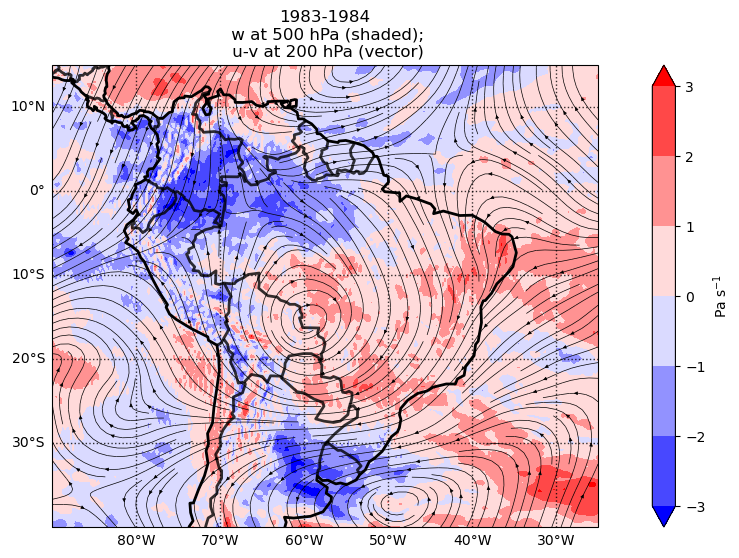

In [55]:
plotW500UV200('1983-1984', W_500, U_200, V_200, X, Y)

c:\Users\nicol\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1662: UserWarning: The following kwargs were not used by contour: 'rasterized'
  result = super().contourf(*args, **kwargs)
c:\Users\nicol\anaconda3\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


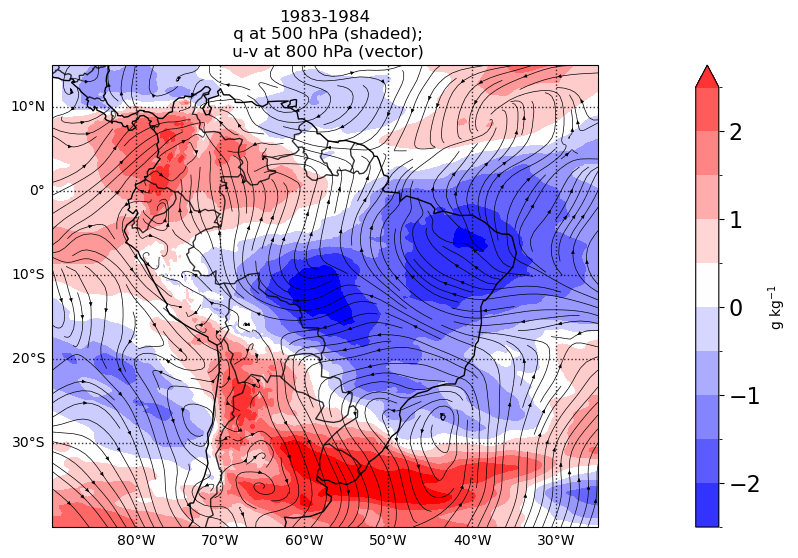

In [56]:
Q500UV800('1983-1984', Q_500, U_800, V_800, X, Y, 'bwr')

# 2003-2004

In [57]:
# Asignamos las variables pertenecientes al verano 2003-2004
Q_500 = HUMIDITY_ZSCORE[index2003, index500]
U_200 = U_ZSCORE[index2003, index200]
V_200 = V_ZSCORE[index2003, index200]
W_500 = W_ZSCORE[index2003, index500]
U_800 = U_ZSCORE[index2003, index800]
V_800 = V_ZSCORE[index2003, index800]

c:\Users\nicol\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1662: UserWarning: The following kwargs were not used by contour: 'rasterized', 'interpolation'
  result = super().contourf(*args, **kwargs)
c:\Users\nicol\anaconda3\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


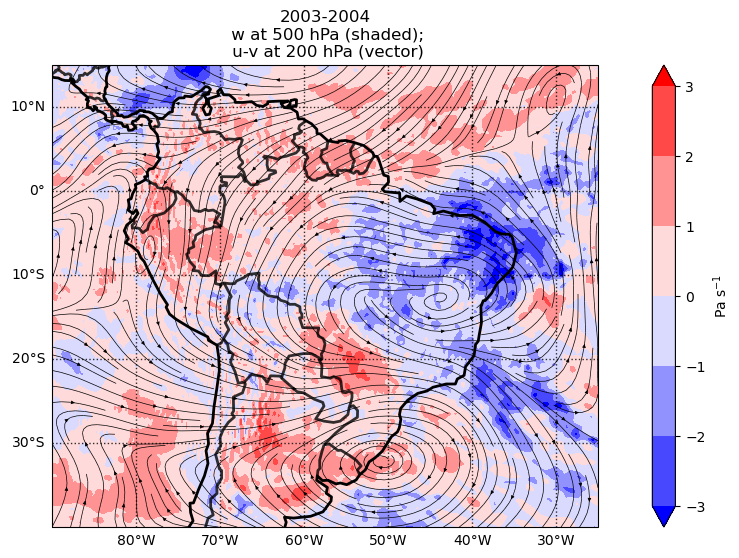

In [58]:
plotW500UV200('2003-2004', W_500, U_200, V_200, X, Y)

c:\Users\nicol\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1662: UserWarning: The following kwargs were not used by contour: 'rasterized'
  result = super().contourf(*args, **kwargs)
c:\Users\nicol\anaconda3\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


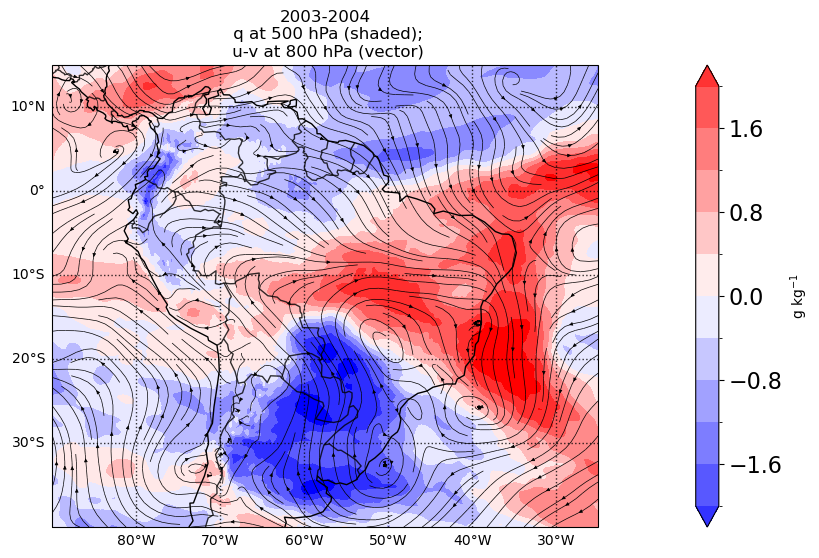

In [59]:
Q500UV800('2003-2004', Q_500, U_800, V_800, X, Y, 'bwr')

# 2011-2012

In [60]:
# Asignamos las variables pertenecientes al verano 2011-2012
Q_500 = HUMIDITY_ZSCORE[index2011, index500]
U_200 = U_ZSCORE[index2011, index200]
V_200 = V_ZSCORE[index2011, index200]
W_500 = W_ZSCORE[index2011, index500]
U_800 = U_ZSCORE[index2011, index800]
V_800 = V_ZSCORE[index2011, index800]

c:\Users\nicol\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1662: UserWarning: The following kwargs were not used by contour: 'rasterized', 'interpolation'
  result = super().contourf(*args, **kwargs)
c:\Users\nicol\anaconda3\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


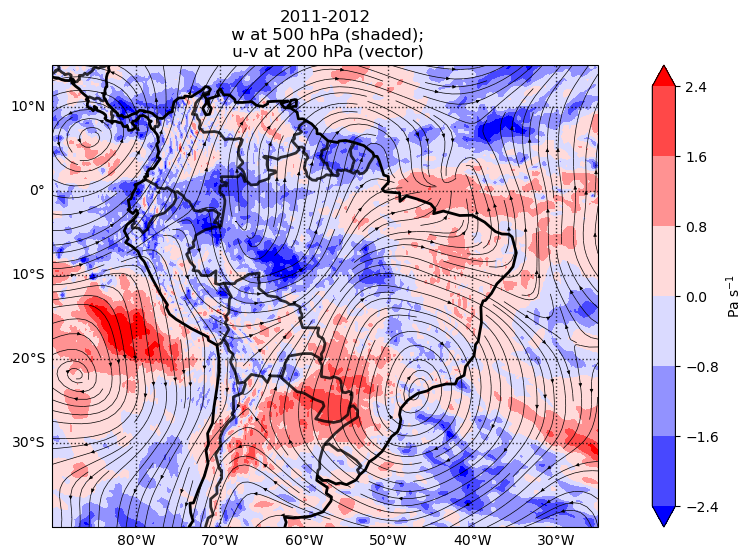

In [61]:
plotW500UV200('2011-2012', W_500, U_200, V_200, X, Y)

c:\Users\nicol\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1662: UserWarning: The following kwargs were not used by contour: 'rasterized'
  result = super().contourf(*args, **kwargs)
c:\Users\nicol\anaconda3\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


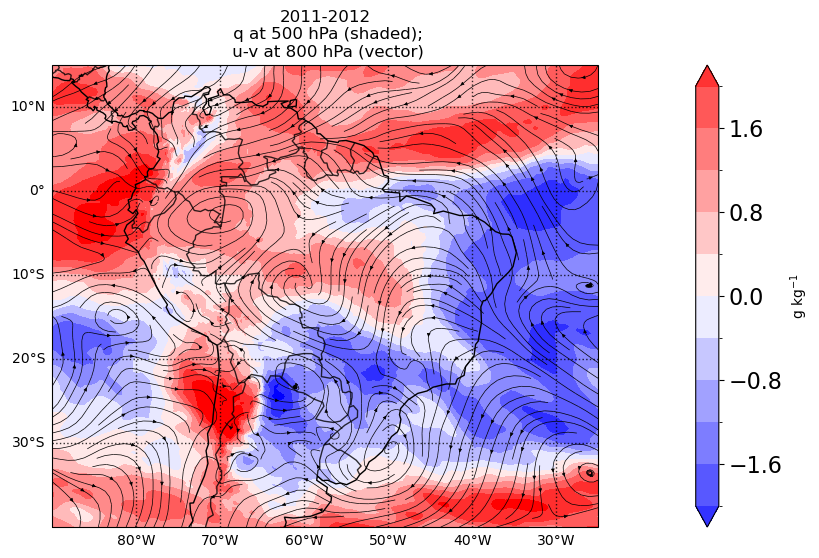

In [62]:
Q500UV800('2011-2012', Q_500, U_800, V_800, X, Y, 'bwr')